# 第16章 教師あり学習（分類）の基礎

## 16.1 教師あり学習（分類）を知る

### 16.1.1 分類とは

### 16.1.2 二項分類と多項分類

### 16.1.3 分類の流れ

### 16.1.4 データを用意する

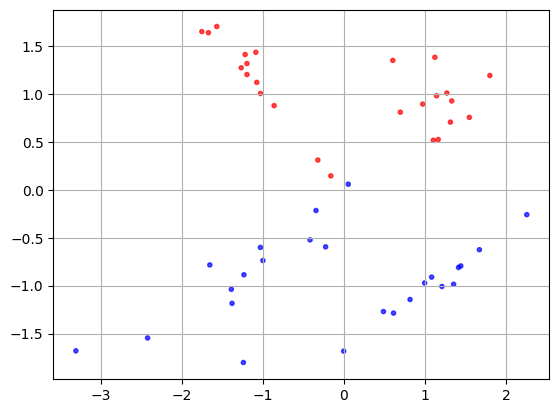

In [61]:
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

x, y = make_classification(n_samples=50, n_features=2, n_redundant=0,random_state=0)

plt.scatter(x[:, 0], x[:, 1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)
plt.grid(True)

plt.show()

### 16.1.5 学習と予測

In [62]:
# ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression

# トレーニングデータとテストデータを分けるやつ
from sklearn.model_selection import train_test_split

# 分類用データを作るやつ
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=10)


train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=10)

# ロジスティック回帰モデル初期化
model = LogisticRegression(random_state=10)

# 学習
model.fit(train_X, train_y)

# 予測
# ..  予測結果 : pred_y
pred_y = model.predict(test_X)

print(test_y)
print(pred_y)

# 正解率
model.score(test_X, test_y)

[1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0]
[1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0]


0.96

## 16.2 主な手法の紹介

### 16.2.1 ロジスティック回帰

[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


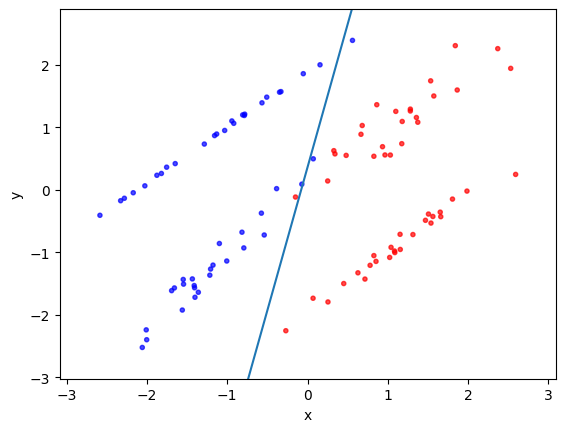

In [63]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

%matplotlib inline


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# ロジスティック回帰モデル初期化
model = LogisticRegression()

# 学習
model.fit(train_X, train_y)

# 予測
# ..  予測結果 : pred_y
pred_y = model.predict(test_X)

print(test_y)
print(pred_y)

# 正解率
model.score(test_X, test_y)

plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

Xi = np.linspace(-10, 10)

Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]

plt.plot(Xi, Y)

plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)

#plt.axes().set_aspect('equal', 'datalim')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 16.2.2 線形SVM

1.0


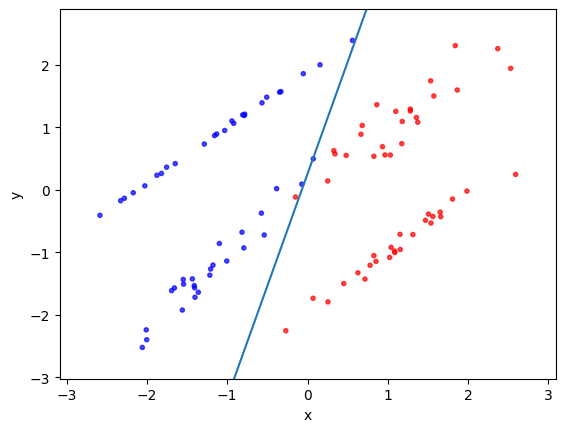

In [64]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


%matplotlib inline


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# 線形SVM
model = LinearSVC()

# 学習
model.fit(train_X, train_y)

# 予測
# ..  予測結果 : pred_y
pred_y = model.predict(test_X)

# 正解率
print(model.score(test_X, test_y))

plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap=matplotlib.cm.get_cmap(name='bwr'), alpha=0.7)

Xi = np.linspace(-10, 10)

Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]

plt.plot(Xi, Y)

plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5)

#plt.axes().set_aspect('equal', 'datalim')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

### 16.2.3 非線形SVM

In [66]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles


%matplotlib inline


data, label = make_gaussian_quantiles(n_samples=1000, n_classes=2, n_features=2, random_state=42)

model = SVC()

model.fit(data, label)

print(model.score(data, label))


0.99


In [67]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles


%matplotlib inline


X, y = make_gaussian_quantiles(n_samples=1000, n_classes=2, n_features=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model_1 = SVC()
model_2 = LinearSVC()


model_1.fit(train_X, train_y)
model_2.fit(train_X, train_y)


# 非線形SVM
print(model_1.score(test_X, test_y))

# 線形SVM
print(model_2.score(test_X, test_y))

0.976
0.528


### 16.2.4 決定木

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = DecisionTreeClassifier()

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

0.96


### 16.2.5 ランダムフォレスト

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = RandomForestClassifier()

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

0.96


### 16.2.6 k-NN（k近傍法）

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = KNeighborsClassifier()

model.fit(train_X, train_y)

print(model.score(test_X, test_y))

1.0
